### Table of contents

#### 1. Importing libraries

#### 2. Importing data

#### 3. Question & Answers

#### 4. Exporting data

### Importing libraries

In [2]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

### Importing data

In [3]:
path = r"C:\Users\tseki\OneDrive\Documents\Careerfoundry\Data immersion\Achievement 4\Instacart Basket Analysis 8-6-22"

In [4]:
df_combined = pd.read_pickle(os.path.join(path, 'Data', 'Prepared data', 'customers_ords_prods_combined.pkl'))

In [5]:
df_combined.head()

,user_id,First Name,Surname,Gender,STATE,Age,date_joined,no_of_dependants,family_status,income,...,reordered,busiest_days,busiest_period_of_day,max_order,loyalty_flag,average_price,spending_flag,median_days_since_prior_order,frequency_flag,_merge
0,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,0,Busiest day,Most orders,8,New customer,7.988281,Low spender,19.0,Regular customer,both
1,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,1,Regularly busy,Most orders,8,New customer,7.988281,Low spender,19.0,Regular customer,both
2,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,1,Busiest day,Most orders,8,New customer,7.988281,Low spender,19.0,Regular customer,both
3,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,0,Regularly busy,Most orders,8,New customer,7.988281,Low spender,19.0,Regular customer,both
4,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,1,Least busy,Most orders,8,New customer,7.988281,Low spender,19.0,Regular customer,both


In [6]:
df_combined.columns

Index(['user_id', 'First Name', 'Surname', 'Gender', 'STATE', 'Age',
       'date_joined', 'no_of_dependants', 'family_status', 'income',
       'product_id', 'product_name', 'aisle_id', 'department_id', 'prices',
       'order_id', 'order_number', 'orders_day_of_week', 'order_hour_of_day',
       'days_since_prior_order', 'new_customer', 'add_to_cart_order',
       'reordered', 'busiest_days', 'busiest_period_of_day', 'max_order',
       'loyalty_flag', 'average_price', 'spending_flag',
       'median_days_since_prior_order', 'frequency_flag', '_merge'],
      dtype='object')

In [7]:
df_combined.shape

(32404859, 32)

In [8]:
df_combined.drop('_merge', axis = 1, inplace = True)

In [9]:
df_combined.columns

Index(['user_id', 'First Name', 'Surname', 'Gender', 'STATE', 'Age',
       'date_joined', 'no_of_dependants', 'family_status', 'income',
       'product_id', 'product_name', 'aisle_id', 'department_id', 'prices',
       'order_id', 'order_number', 'orders_day_of_week', 'order_hour_of_day',
       'days_since_prior_order', 'new_customer', 'add_to_cart_order',
       'reordered', 'busiest_days', 'busiest_period_of_day', 'max_order',
       'loyalty_flag', 'average_price', 'spending_flag',
       'median_days_since_prior_order', 'frequency_flag'],
      dtype='object')

#### Task

Text(0.5, 0, 'Hour of day')

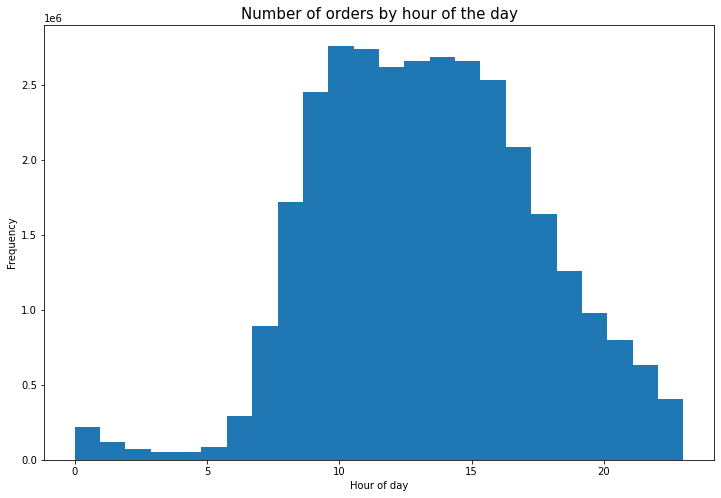

In [10]:
# Question 3: Create a histogram of the “order_hour_of_day” column.
# In a markdown cell beneath your histogram, describe what the histogram demonstrates.

hist_hour = df_combined['order_hour_of_day'].plot.hist(bins = 24, figsize = (12,8))

plt.title('Number of orders by hour of the day', fontsize=15)
plt.xlabel('Hour of day')


###### The histogram above represents hours of the days(0-23hrs) on the axis and the total number of orders placed each hour. The highest sales are between 10am and 11am. Lowest sales are between 3am and 4am. Broadly speaking, people order more during the late mornings and afternoon period(9am to 4pm). This is a very active period for most people. Less sales are made at midnight/post midnight (12am to 5am) as expected since most people are asleep.

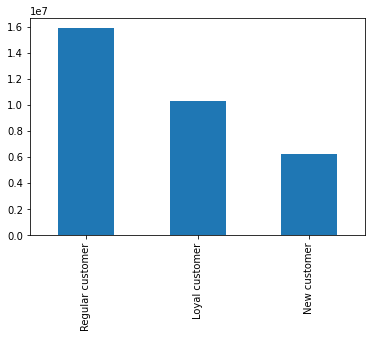

In [11]:
# Question 4; Create a bar chart from the “loyalty_flag” column.

bar_loyalty_flag = df_combined['loyalty_flag'].value_counts().plot.bar()

In [12]:
# Question 5: Check whether there’s a difference in expenditure (the “prices” column) depending on the hour of the day.

# Specifying only the needed column for the line chart and assigning it to a dataframe
df_2 = df_combined[['order_hour_of_day','prices']]

In [13]:
# Checking output
df_2.head()

,order_hour_of_day,prices
0,9,9.000000
1,15,9.000000
2,15,9.000000
3,9,4.300781
4,11,4.300781


<Figure size 864x576 with 0 Axes>

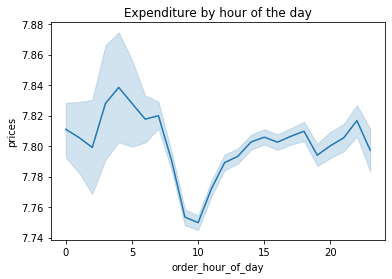

<Figure size 864x576 with 0 Axes>

In [14]:
# Creating the line chart, expenditure by hour of the day


line1 = sns.lineplot(data = df_2, x = 'order_hour_of_day',y = 'prices')

plt.title('Expenditure by hour of the day')
plt.figure(figsize = (12,8))

##### Observation: Even though the highest orders were between 10am and 11am(from the histogram), the line chart shows that the least expenditure were also around that time, meaning people were not spending as much money during that time compared to other hours of the day.

##### Likewise, expenditure was highest during the early hours of the day (4am to 5am) even though orders were low(from histogram) during this period.

In [15]:
# Queston 6: Now that you have information about customers, you need to conduct some exploratory analysis of customer 
# demographics to inform the targeted marketing campaigns. First, determine whether there’s a connection between age and family 
# situation by creating a line chart exploring the connections between age and number of dependents:


##### In answering question 6, i would like to carry out the analysis on both the whole dataset and a sample of the dataset. This is to satisfy my curiosity about the representativeness of the sample. if the sample is truly representative of the entire dataset, i expect the result(dataviz) to be the same.

In [16]:
# Specifying only the columns needed for the line chart and assigning it to a dataframe

df_3 = df_combined[['Age', 'no_of_dependants']]

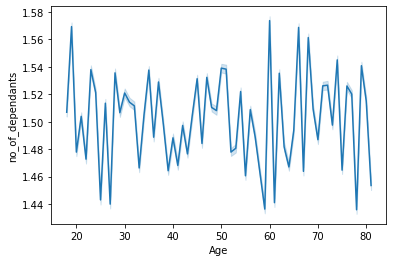

In [17]:
# Creating the line chart
line = sns.lineplot(data = df_3, x = 'Age', y = 'no_of_dependants')

In [18]:
# Creating a sample of df_combined to create a linechart


# create a list holding True/False values to the test np.random.rand <= 0.7
np.random.seed(5)
dev = np.random.rand(len(df_combined)) <= 0.7

In [19]:
# store 70% of the sample in the dataframe big (i.e all Trues)
big = df_combined[dev]

In [20]:
# store 30% of the sample in the dataframe small (i.e all False)
small = df_combined[~dev]

In [21]:
# Confirming output
len(df_combined)

32404859

In [22]:
len(big) + len(small)

32404859

In [23]:
# Specifying only the needed column for the line chart and assigning it to a dataframe
df_3 = small[['Age','no_of_dependants']]

In [24]:
df_3.head()

,Age,no_of_dependants
1,48,3
3,48,3
6,48,3
11,48,3
14,48,3


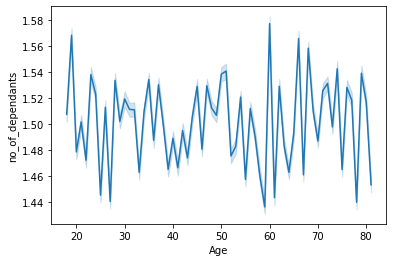

In [25]:
line2 = sns.lineplot(data = df_3, x = 'Age',y = 'no_of_dependants')

#### I got same results using both the entire dataset and a random sample of the dataset. Great!

##### Ans to question 6: From the line charts above, there doesn't seem to be a relationship between age and the number of dependants.

In [26]:
# Question 7:You’ll also need to explore whether there’s a connection between age and spending power (income). To visualize this 
# relationship, create a scatterplot using the sns.scatterplot() function.

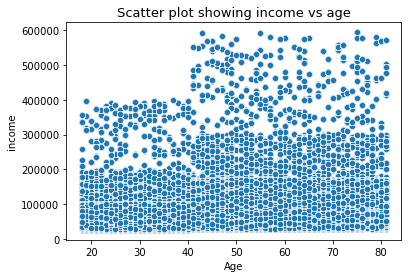

In [33]:
plt.title('Scatter plot showing income vs age', fontsize=13)

plot_age_income = sns.scatterplot(x = 'Age', y = 'income',data = df_combined)

##### 1. Most of instacart customers earn below 300,000.
##### 2. Most of the customers who earn above 300,000 are above 40 yrs old.
##### 3. Based on these obeservation, we can infer that older customer(above 40) are more likely to spend more based on their higher income.

### Exporting data

In [28]:
hist_hour.figure.savefig(os.path.join(path, 'Analysis','Visualization', 'hist_hours_of_day.png'))

In [29]:
bar_loyalty_flag.figure.savefig(os.path.join(path, 'Analysis','Visualization', 'bar_loyalty_flag.png'))

In [30]:
line1.figure.savefig(os.path.join(path, 'Analysis', 'Visualization', 'linechart_hour_prices.png'))

In [31]:
line2.figure.savefig(os.path.join(path, 'Analysis', 'Visualization', 'linechart_age_no_of_dependants.png'))

In [34]:
plot_age_income.figure.savefig(os.path.join(path,'Analysis', 'Visualization', 'plot_age_income.png'))